In [194]:
import numpy as np
import pandas as pd
import scipy.io as sio   ## for loading octave matlab file
import math
from scipy.special import expit #Vectorized sigmoid function
import matplotlib.pyplot as plt

In [219]:
mat_contents = sio.loadmat(r"C:\Users\user\Documents\Machine learning\machine-learning-ex3\ex3\ex3data1.mat")
# training data stored in arrays X, y
X=mat_contents['X']
y=mat_contents['y']          #### taking out X and y from the matrix

m=len(X)


In [218]:
# Randomly select 100 data points to display

sel = np.random.choice(X.shape[0], size=100, replace=False)
selected_X=X[sel]


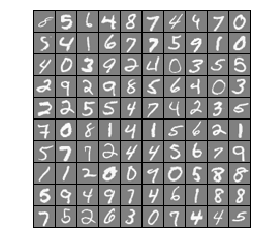

In [220]:
##  FUNCTION TO DISPLAY DATA This function maps each row to a 20 pixel by 20 pixel grayscale image and 
##  displays the images together
def displayData(X, example_width=None):
    # closes previously opened figure. preventing a
    # warning after opening too many figures
    plt.close()

# creates new figure 
    plt.figure()
# Set example_width automatically if not passed in
    if not example_width or not 'example_width' in locals():
        example_width = int(round(math.sqrt(X.shape[1])))
# Gray Image color map 
    plt.set_cmap("gray")
#Compute rows, cols
    m,n = X.shape
    example_height =int(n / example_width)
# Compute number of items to display
    display_rows = int(math.floor(math.sqrt(m)))
    display_cols = int(math.ceil(m / display_rows))
# Between images padding
    pad = 1
# Setup blank display
    display_array = -np.ones((pad + display_rows * (example_height + pad),  pad + display_cols * (example_width + pad)))
    
    curr_ex = 1
    #Copy each example into a patch on the display array    
    for j in range(1,display_rows+1):
        for i in range(1,display_cols+1):
            if curr_ex > m:
                break
            ##Copy the patch
            #Get the max value of the patch
            max_val = max(abs(X[curr_ex-1, :]))  
            rows = pad + (j - 1) * (example_height + pad) + np.array(range(example_height))
            cols = pad + (i - 1) * (example_width  + pad) + np.array(range(example_width ))
            display_array[rows[0]:rows[-1]+1 , cols[0]:cols[-1]+1] = np.reshape(X[curr_ex-1, :], (example_height, example_width), order="F") / max_val
            curr_ex += 1
        if curr_ex > m:
            break
    # Display Image
    h = plt.imshow(display_array, vmin=-1, vmax=1)
    # Do not show axis
    plt.axis('off')
    plt.show(block=False)
    return h, display_array

a,b=displayData(selected_X)
m,n = X.shape

In [198]:
###   Vectorizing Logistic Regression
##    You can use your code in the last exercise as a starting point for this exercise.

In [199]:

##### defining the hypothesis
def hypothesis(theta,X):
  # print(type(a))
    hypo=sigmoid(X.dot(theta))    ####calling the sigmoid function
    return hypo
#hypo=hypothesis(theta,X)         #####returning the hyposthesis array  

In [200]:
######  defining the cost function

def computeCost(theta,X,Y,mylambda=0.):
    term1 = np.dot(-np.array(Y).T,np.log(hypothesis(theta,X)))
    term2 = np.dot((1-np.array(Y)).T,np.log(1-hypothesis(theta,X)))
    return float( (1./len(Y)) * ( np.sum(term1 - term2) ) )              

In [201]:
### difining the gradient function  ###
def gradient(Y,theta,X):
    return (X.transpose()).dot(hypothesis(theta,X)-Y)/len(Y)
    

In [202]:
######  defining the cost function   @####   REGULARIZATION WITH COST FUNCTION

def computeCost_regularized(theta,X,Y,mylambda=0.):
    term1 = np.dot(-np.array(Y).T,np.log(hypothesis(theta,X)))    #### storing the first term
    term2 = np.dot((1-np.array(Y)).T,np.log(1-hypothesis(theta,X)))    #### storing the second term
    regterm = (mylambda/2) * (-theta[0]**2 + np.sum(np.array(theta)**2)) #Skip theta0        most important thing to note that summation 
    return float( (1/len(Y)) * ( np.sum(term1 - term2) + regterm ) )        ##start from theta zero so we subtracted theta[0]^2

In [203]:
#######    defining GRADIENT %%%%  REGULARIZATION WITH gradient%%%%%%%

def gradient_regularized(Y,theta,X,lmd):
   
    a= (np.dot(X.transpose(),(hypothesis(theta,X)-Y) )+ np.multiply(lmd,theta))/len(Y)
    a[0]=a[0]-(lmd*theta[0])/len(Y)
    return a

In [204]:
#####    ONE VS ALL CLASSIFICATION   #######

In [205]:
def sigmoid(x):
    ##IF X IS INTEGER
    if type(x) == int:  
        y=1/(1+np.exp(-x))
        return y

    elif type(x) == type([]): 
        
        for i in range(len(x)):
            x[i]=1/(1+np.exp(-x[i]))
        return x
    
    elif type(x) == np.ndarray: 
        y=np.zeros(x.shape)
        y=1/(1+np.exp(-x))
        
        return y
####   Setup the parameters you will use for this part of the exercise
input_layer_size  = 400; ######## % 20x20 Input Images of Digits
num_labels = 10;          ########## 10 labels, from 1 to 10
                          ########### (note that we have mapped "0" to label 10)
all_theta = np.zeros((num_labels, n + 1))

###########################           testing data           ###############################
theta_t = [-2, -1, 1, 2]

X_t1 = np.ones((5,1))                                    #####  for making X_t

X_t2 = np.reshape(np.array([i/10 for i in range(1,15+1)]),(3,5)).T          #####  for making X_t
#print(X_t1)
#print(X_t2)
X_t=np.concatenate((X_t1,X_t2),axis=1)
X_t

y_t = np.array([1,0,1,0,1])
#print(theta_t)
#print(y_t)
#print(X_t)
#print(X_t.transpose())
lambda_t = 3
#print(lambda_t*theta_t)
print(computeCost_regularized(theta_t,X_t,y_t,lambda_t))
print(gradient_regularized(y_t,theta_t,X_t,lambda_t))

5000
400
2.5348193961097443
[ 0.14656137 -0.54855841  0.72472227  1.39800296]


In [206]:
from scipy.optimize import minimize


print(theta_t)
from scipy import optimize

######   this optimize function optimizes the function over number of iterations and tell us the best possible theta 
######   and the minimum cost
def optimizeTheta(mytheta,myX,myy,mylambda=0.):
    result = optimize.minimize(computeCost, mytheta, args=(myX, myy, mylambda),  method='BFGS', options={"maxiter":20, "disp":False} )
    return np.array([result.x]), result.fun

[-2, -1, 1, 2]


In [207]:
print(X.shape)
y.shape

(5000, 400)


(5000, 1)

In [232]:

def one_vs_all_classification(X,y,num_labels,mylambda):
    m,n = np.shape(X)
    ## this all theta will contain the learned parameters
    all_theta = np.zeros((num_labels, n + 1))
    print(all_theta.shape)
    X=np.concatenate((np.ones((m,1)),X),axis=1)    ###### adding 1's column

    initial_theta = np.zeros((n+1,1)).ravel()         ## this will be passed in optimize function
    k=10
    for c in range(0, num_labels):             ####    loop through the classifiers
        print('for x'+str(c))
        if (c==0):                                ##### bcoz 0 is mapped to 10 in this exercise
            class_x = 10
        else:
            class_x  =  c                       
        y_label=np.zeros((m,1))     
        y_label=[1 if class_x==i else 0 for i in y]              #### binary classification such that for each classifier 
                                                                ####  it contain 1's where ithere is that number and 0's 
                                                                #####  everywhere else
        theta_x,mincost_x=optimizeTheta(initial_theta,X,y_label,0.1)
        
        all_theta[c] = theta_x
    return all_theta


In [209]:
all_theta=one_vs_all_classification(X,y,num_labels,0.1)

(10, 401)
0
1
2
3
4
5
6
7
8
9


In [211]:
###    predict one vs all      #####

In [236]:
def predictOneVsAll(all_theta, X):
    p = np.zeros((m,1))              # this will be returned
    correct_op=0
    hyp = np.zeros((10,1))           ## contains 10 hypothesis for every classifier and we will select the one with max value
                                    ##   i.e. highest probablity
    X=np.concatenate((np.ones((m,1)),X),axis=1)
    for i in range(len(X)):        
        for j in range(10):
            hyp[j] = expit(np.dot(all_theta[j],X[i].transpose()))   #work same as hypothesis
        p[i]=np.argmax(hyp)                     ### calculating max
        y=mat_contents['y']
        temp=0
        if y[i]==10:
            temp=0
        else:
            temp=y[i]
            
        if p[i]==temp:
            correct_op+=1
        
    accuracy=(correct_op*100)/len(X)           ## accuracy in percentage
    print(accuracy)                            #### u can increase the iteration in optimize function to increase accuracy
    return p  
X.shape           

(5000, 400)

In [237]:
p=predictOneVsAll(all_theta,X)

90.22


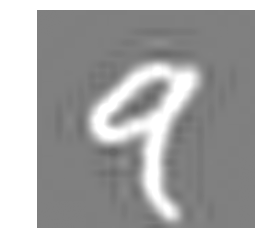

In [214]:
 ###  an example to show how digits are stored 
    
Xt=mat_contents['X'][4500].reshape(20,20).T

h = plt.imshow(Xt, vmin=-1, vmax=1,interpolation='sinc')
# Do not show axisdisplay_array
plt.axis('off')
    
plt.show(block=False)
     
